# Лабораторная работа 2
# Алгоритмы машинного обучения
### _Студент: Чумасов Д.О._
### _Группа: М80-404Б._

## _Постановка задачи_
Требуется реализовать класс на выбранном языке программирования, который реализует один из алгоритмов машинного обучения. Обязательным является наличия в классе двух методов fit, predict. Необходимо проверить работу вашего алгоритма на ваших данных (на таблице и на текстовых данных), произведя необходимую подготовку данных. Также необходимо реализовать алгоритм полиномиальной регрессии, для предсказания значений в таблице. Сравнить результаты с стандартной реализацией sklearn, определить в чем сходство и различие ваших алгоритмов. Замерить время работы алгоритмов. Каркас класса на языке Python:<br>

class MLAlgo(object):

def __init__(self,*pargs,**kwargs):

pass

def fit(self,x,y):

pass

def predict(self,x,y):

Выбор алгоритма осуществляется по: 13 % 6 + 1 =2 => KNN

__[Датасет1](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009):__набор данных о качестве вина(Содержит, количественные признаки.)__

 __[Датасет2](https://www.kaggle.com/enikolov/reviews-tripadvisor-hotels-and-edmunds-cars):__Набор данных об отелях в различных городах (Представляет собой корпус документов отзывы к отелям.)__

### _Алгоритм_

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:<br>
- Вычислить расстояние до каждого из объектов обучающей выборки
- Отобрать k объектов обучающей выборки, расстояние до которых минимально
- Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди k ближайших соседей

## Табличные данные

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sb

ad = pd.read_csv(r'E:\temp\winequality-red.csv')
ad.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Колонки и информация по датасету**

In [3]:
print(ad.columns)
print(ad.info())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


**Предварительная обработка данных**

In [5]:
columns_need = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

ad = ad[columns_need]
ad = ad.dropna() #в случае пропуска убираем значение из данных

ad = ad.iloc[::3,:]
X = ad.drop('quality',axis=1)
Y = ad['quality'].astype('str')

ad.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 1593
Data columns (total 12 columns):
fixed acidity           178 non-null float64
volatile acidity        178 non-null float64
citric acid             178 non-null float64
residual sugar          178 non-null float64
chlorides               178 non-null float64
free sulfur dioxide     178 non-null float64
total sulfur dioxide    178 non-null float64
density                 178 non-null float64
pH                      178 non-null float64
sulphates               178 non-null float64
alcohol                 178 non-null float64
quality                 178 non-null int64
dtypes: float64(11), int64(1)
memory usage: 18.1 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0
27,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5
36,7.8,0.60,0.14,2.4,0.086,3.0,15.0,0.9975,3.42,0.60,10.8


**Для того, чтобы показать какие ошибки были допущены при классификации построим тепловые карты.**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import time

#для построения heatmap
def heat_map_plot(y_t,y_p):
    class_names = [0, 1]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)

    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_t, y_p)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()
    
table = []; 

In [8]:
# разделяем данные

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                   test_size=0.2,
                                                   random_state=0)
print("Кол-во тренировочных данных = " + str(len(x_train)))
print("Кол-во тестовых данных = " + str(len(y_test)))

Кол-во тренировочных данных = 142
Кол-во тестовых данных = 36


**Реализация KNN**

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy.linalg as la

#теперь реализуем свой класс knn
class knn:
    def __init__(self,k=3,metric='minkowski'):
        self.k = k
        self.metric = metric
    
    def fit(self,x,y):
        self.x_train = x;
        self.y_train = y;
        
    def predict(self,x_test):
        res = []
        dist = self.choice() #получаем функцию по которой будем считать расстояние
        for i in range(x_test.shape[0]):
            distances = []
            targets = {}
            for j in range(self.x_train.shape[0]):
                distance = dist(self.x_train[j],x_test[i])
                distances.append([distance, j])

            distances = sorted(distances)
        
            for j in range(self.k): 
                index = distances[j][1]
                elem = self.y_train[index] 
                if(elem in targets): 
                    targets[elem] += 1;
                else:
                    targets[elem] = 1
                    
            res.append(sorted(targets.items(), key=lambda a:a[1], reverse=True)[0][0])
        return res
    
    #далее идут метрики
    def euclid(self,x,y):
        return np.sqrt(np.sum((x - y)**2))

    def manhattan(self,x,y):
        return np.sum(np.abs(x - y))

    def chebyshev(self,x,y):
        return np.max(np.abs(x - y))

    def minkowski(self,x,y,p=1.2):
        return np.sum(np.abs(x - y)**p)**(1/p)
    
    def cosin(self,a,b):
        return round(np.inner(a, b)/(la.norm(a)*la.norm(b)), 3)
    
    def choice(self):
        if(self.metric == 'euclid'):
            return self.euclid
        elif(self.metric == 'manhattean'):
            return self.manhattan
        elif(self.metric == 'chebyshev'):
            return self.chebyshev
        elif(self.metric == 'minkowski'):
            return self.minkowski
        elif(self.metric == 'cosin'):
            return self.cosin
        else:
            return self.euclid

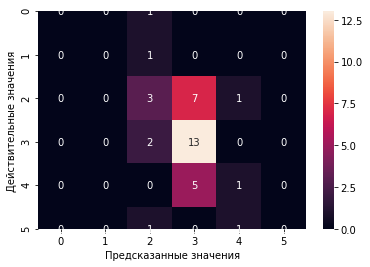

accuracy =  0.4722222222222222
time = 0.13100576400756836 sec


In [15]:
x = x_train.values
y = y_train.values

kn = knn(10,'minkowski')
start_time = time.time()
kn.fit(x,y)
y_pred = kn.predict(x_test.values)
t = (time.time() - start_time)
heat_map_plot(y_test,y_pred)
print("accuracy = ",metrics.accuracy_score(y_test, y_pred))#выводит точность классификации
print("time = " + str(t) + " sec")#выводит затраченное время

**Реализация sklearn**

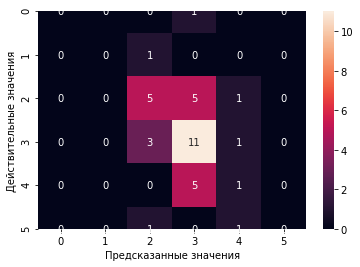

accuracy =  0.4722222222222222
time = 0.009994029998779297 sec


In [16]:
#метод k- ближайших соседей
cls = KNeighborsClassifier(algorithm='brute')
start_time = time.time()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
t = (time.time() - start_time)
heat_map_plot(y_test,y_pred)
print("accuracy = ",metrics.accuracy_score(y_test, y_pred))
print("time = " + str(t) + " sec")

## Полиномиальная регрессия

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


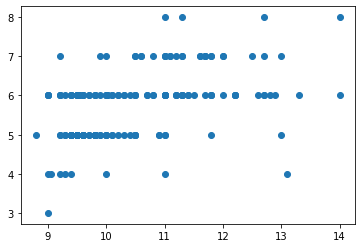

Размер выборки: 178


In [20]:
print(ad.columns)
plt.scatter(ad['alcohol'],ad['quality'])
plt.show()
ads = ad.copy()
ads = ads.sort_values(by='alcohol')
x = ads['alcohol'].values 
y = ads['quality'].values
print('Размер выборки: ' + str(len(x)))

### Реализация
Построить регрессию – это значит подобрать такую функцию, которая как можно точнее аппроксимирует множество точек, полученных из данных пар. То есть надо найти приближение данных (x,y) полиномом k-степени.

y* = -0.102x^2 + 2.592x^1 + -10.125
y* = -0.003x^3 + 0.016x^2 + 1.282x^1 + -5.308
y* = 0.044x^4 + -2.013x^3 + 33.904x^2 + -250.894x^1 + 693.571


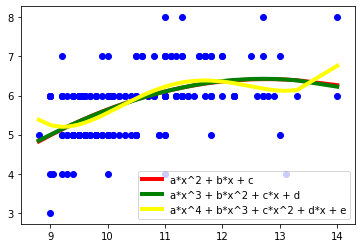

Расчет среднеквадратической ошибки:
MSE2 = 0.560286940628876
MSE3 = 0.5602351901366002
MSE4 = 0.5421847634243843
time = 0.04500126838684082sec


In [21]:
def nonlinear(x,y,p=3,z=4):
    m = np.zeros((p,p))
    b = np.zeros(p)
    for i in range(p):
        for j in range(p):
            m[i][j] = np.sum(x**(z-i-j))
        b[i] = np.dot(x**((z/2)-i),y)
    return np.linalg.solve(m,b)#решает систему

def print_func(coef,rd=3):
    print('y* = ',end='')
    for i,e in enumerate(coef):
        if(i != len(coef)-1):
            print(str(round(e,rd)) + 'x^' + str(len(coef) - i - 1) + ' + ',end='')
    print(round(coef[len(coef)-1],rd))

start_time = time.time() #засекаем время

lws = 4
#--------------------------------
coef = nonlinear(x,y) #квадратичная аппроксимация
y_pp = [];
for i in x:
    y_pp.append(coef[0]*i*i + coef[1]*i + coef[2])
plt.plot(x,y_pp,color='red',label='a*x^2 + b*x + c',linewidth=lws)
print_func(coef)

#--------------------------------
coef = nonlinear(x,y,4,6) #кубическая аппроксимация
y_ppp = []
for i in x:
    arr = np.array([i**3,i**2,i,1])
    y_ppp.append(np.dot(arr,coef))
plt.plot(x,y_ppp,color='green',label='a*x^3 + b*x^2 + c*x + d',linewidth=lws)
print_func(coef)

#--------------------------------
coef = nonlinear(x,y,5,8) #аппроксимация 4-й степени
y_pppp = []
for i in x:
    arr = np.array([i**4,i**3,i**2,i,1])
    y_pppp.append(np.dot(arr,coef))
plt.plot(x,y_pppp,color='yellow',label='a*x^4 + b*x^3 + c*x^2 + d*x + e',linewidth=lws)
print_func(coef)
t = (time.time() - start_time)

plt.scatter(x,y,color='blue')
plt.legend()
plt.show()

#--------------------------------
y_pp,y_ppp,y_pppp = np.array(y_pp),np.array(y_ppp),np.array(y_pppp)

print('Расчет среднеквадратической ошибки:')
print('MSE2 = ' + str(((y_pp-y)**2).mean()))
print('MSE3 = ' + str(((y_ppp-y)**2).mean()))
print('MSE4 = ' + str(((y_pppp-y)**2).mean()))
print('time = ' + str(t) + 'sec')

**Используя sklearn**

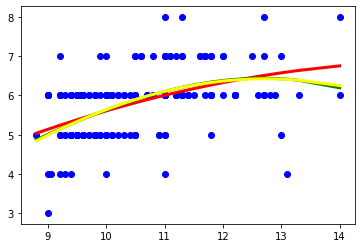

MSE2 = 0.5696334085490092
MSE3 = 0.5602832478056895
MSE4 = 0.5599829227711597
time = 0.013992786407470703sec


In [23]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

plt.scatter(x,y,color='blue')
colors = ['red', 'green', 'yellow']
lw = 3
mse = []
start_time = time.time() #засекаем время
for count, degree in enumerate([2, 3, 4]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    X = x[:, np.newaxis]
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.plot(x, y_pred, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
    mse.append(mean_squared_error(y_pred,y))
t = (time.time() - start_time)
plt.show()

for i,e in enumerate(mse):
    print('MSE' + str(i+2) + ' = ' + str(e))
print('time = ' + str(t) + 'sec')

### Вывод
В ходе данной лаборторной работы были реализованы алгоритмы k ближайших соседей и полиномиальной регрессии. На табличных данных KNN предсказывает с точностью 47%. Точность моей реализации и реализации с помощью sklearn практически совпадают, но затраченное время отличается в разы (sklearn многократно быстрее). Возможно, данные выбраны не совсем удачно или надо было их лучше обработать.